## Importing the necessary libraries

In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [188]:
credit = pd.read_csv('final_datasets/credit_data.csv')
cycles = pd.read_csv('final_datasets/cycles.csv')
failure = pd.read_csv('final_datasets/failure_events_data.csv')
settlements = pd.read_csv('final_datasets/settlements_data.csv')
test = pd.read_csv('final_datasets/test.csv')
transactions = pd.read_csv('final_datasets/transactions_data.csv')
users = pd.read_csv('final_datasets/users_data.csv')

## Learning about data using .sample(), .info(), .describe(), .isnull().sum()

sample(n) -> Shows 'n' random rows present in dataset

info() -> Describes data types present, number of rows, number of columns, memory usage of dataset

describe() -> Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

isnull().sum() -> Shows number of NaN values present in each column in the DataFrame

#### Comment : This part is quite lengthy as it consists of understanding all the datasets, so you might want to skip this if you only want to see the visualizations / application of machine learning.

In [4]:
credit.sample(7)

,user_id,cycle_id,global_credit_limit
17162,8322,14,75000
12403,6588,10,150000
2611,9532,14,75000
6812,4111,18,150000
18012,4323,9,150000
5137,4764,10,150000
11916,11183,19,150000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18468 entries, 0 to 18467
Data columns (total 3 columns):
user_id                18468 non-null int64
cycle_id               18468 non-null int64
global_credit_limit    18468 non-null int64
dtypes: int64(3)
memory usage: 432.9 KB


In [6]:
credit.describe()

,user_id,cycle_id,global_credit_limit
count,18468.000000,18468.000000,18468.000000
mean,8067.809129,14.217295,126512.887156
std,4362.935645,4.649221,65312.491560
min,1.000000,2.000000,50000.000000
25%,4284.750000,10.000000,75000.000000
50%,8436.500000,15.000000,150000.000000
75%,11720.250000,18.000000,150000.000000
max,16045.000000,22.000000,1000000.000000


In [7]:
credit.isnull().sum()

user_id                0
cycle_id               0
global_credit_limit    0
dtype: int64

In [8]:
cycles.sample(7)

,cycle_id,start_date,end_date
12,13,2016-04-30 15:30:01 +0000 +0000,2016-05-15 15:30:00 +0000 +0000
10,11,2016-03-31 15:30:01 +0000 +0000,2016-04-15 15:30:00 +0000 +0000
3,4,2015-12-16 00:00:00 +0000 +0000,2015-12-31 23:59:59 +0000 +0000
15,16,2016-06-15 15:30:01 +0000 +0000,2016-06-30 15:30:00 +0000 +0000
21,22,2016-09-15 15:30:01 +0000 +0000,2016-09-30 15:30:00 +0000 +0000
5,6,2016-01-16 00:00:00 +0000 +0000,2016-01-31 23:59:59 +0000 +0000
0,1,2015-11-01 00:00:00 +0000 +0000,2015-11-15 00:00:00 +0000 +0000


In [9]:
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
cycle_id      23 non-null int64
start_date    23 non-null object
end_date      23 non-null object
dtypes: int64(1), object(2)
memory usage: 632.0+ bytes


In [10]:
cycles.isnull().sum()

cycle_id      0
start_date    0
end_date      0
dtype: int64

In [11]:
failure.sample(7)

,failure_event_id,transaction_id,user_id,failure_type,amount_in_paise,created_at
12366,12367,104031,11970,error2,28200,2016-08-21 11:10:26.402877 +0000 +0000
1536,1537,18902,5027,error1,21400,2016-04-12 15:17:19.987564 +0000 +0000
2617,2618,29581,5776,error2,22400,2016-05-01 17:30:40.052621 +0000 +0000
5023,5024,50277,4511,error2,37000,2016-06-06 16:34:02.908327 +0000 +0000
6484,6485,61210,5636,error2,47600,2016-06-24 17:09:21.680878 +0000 +0000
6766,6767,63007,834,error3,28700,2016-06-27 13:01:40.765798 +0000 +0000
1414,1415,17079,5837,error3,28500,2016-04-07 15:44:11.761376 +0000 +0000


In [12]:
failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17993 entries, 0 to 17992
Data columns (total 6 columns):
failure_event_id    17993 non-null int64
transaction_id      17993 non-null int64
user_id             17993 non-null int64
failure_type        17993 non-null object
amount_in_paise     17993 non-null int64
created_at          17993 non-null object
dtypes: int64(4), object(2)
memory usage: 843.5+ KB


In [13]:
failure.describe()

,failure_event_id,transaction_id,user_id,amount_in_paise
count,17993.000000,17993.000000,17993.000000,1.799300e+04
mean,8997.000000,77461.629800,7005.346079,4.127597e+04
std,5194.276032,39255.071653,4102.698217,1.039872e+05
min,1.000000,56.000000,1.000000,0.000000e+00
25%,4499.000000,45380.000000,3437.000000,1.900000e+04
50%,8997.000000,79189.000000,6817.000000,2.680000e+04
75%,13495.000000,111762.000000,10327.000000,3.890000e+04
max,17993.000000,141704.000000,16029.000000,1.045490e+07


In [14]:
failure.isnull().sum()

failure_event_id    0
transaction_id      0
user_id             0
failure_type        0
amount_in_paise     0
created_at          0
dtype: int64

In [16]:
settlements.sample(7)

,id,user_id,cycle_id,settlement_amount,settlement_status,days_delayed,bill_created_at,settled_at
23270,7742,1679,13.0,123000,onetime_settlement,NaN,NaN,2016-05-08 09:25:40.873556 +0000 +0000
21249,9134,5481,13.0,31700,bill_settled,8.019809,2016-05-15 15:37:48.676583 +0000 +0000,2016-05-23 16:06:20.160917 +0000 +0000
19246,8259,13096,13.0,26200,bill_settled,17.852984,2016-05-15 15:31:19.32232 +0000 +0000,2016-06-02 11:59:37.136416 +0000 +0000
18733,8881,4211,13.0,32100,bill_settled,21.746186,2016-05-15 15:34:42.74746 +0000 +0000,2016-06-06 09:29:13.179089 +0000 +0000
27452,3115,3204,10.0,52300,bill_settled,1.001040,2016-03-31 15:32:43.079853 +0000 +0000,2016-04-01 15:34:12.893315 +0000 +0000
20647,8100,196,13.0,148300,bill_settled,16.005357,2016-05-15 15:30:25.324164 +0000 +0000,2016-05-31 15:38:08.193015 +0000 +0000
25369,5589,6208,12.0,23900,onetime_settlement,NaN,NaN,2016-04-25 07:19:12.701964 +0000 +0000


In [17]:
settlements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30683 entries, 0 to 30682
Data columns (total 8 columns):
id                   30683 non-null int64
user_id              30683 non-null int64
cycle_id             30681 non-null float64
settlement_amount    30683 non-null int64
settlement_status    30683 non-null object
days_delayed         22395 non-null float64
bill_created_at      24980 non-null object
settled_at           28098 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [18]:
settlements.describe()

,id,user_id,cycle_id,settlement_amount,days_delayed
count,30683.000000,30683.000000,30681.000000,30683.000000,22395.000000
mean,15378.590620,6210.827527,15.237737,50890.082065,5.098359
std,8907.130545,3667.269698,3.560640,40286.805289,9.669068
min,1.000000,1.000000,5.000000,37.000000,0.000674
25%,7676.500000,3282.000000,13.000000,23300.000000,0.587529
50%,15351.000000,5927.000000,16.000000,37600.000000,1.185550
75%,23030.500000,8962.000000,18.000000,65464.000000,5.789314
max,31096.000000,16033.000000,21.000000,746000.000000,210.576996


In [19]:
settlements.isnull().sum()

id                      0
user_id                 0
cycle_id                2
settlement_amount       0
settlement_status       0
days_delayed         8288
bill_created_at      5703
settled_at           2585
dtype: int64

In [20]:
settlements.settlement_status.value_counts()

bill_settled          22395
onetime_settlement     5703
bill_pending           2585
Name: settlement_status, dtype: int64

In [22]:
test.head(7)

,user_id
0,1435
1,9826
2,5700
3,9548
4,7358
5,11706
6,12399


In [23]:
test.shape

(3493, 1)

In [24]:
transactions.sample(7)

,transaction_id,user_id,merchant_id,transaction_amount,created_at
39882,67941,10358,1,20100,2016-07-03 08:22:35.823276 +0000 +0000
66315,16552,1956,1,28300,2016-04-06 08:45:04.421555 +0000 +0000
11294,121166,11020,1,28000,2016-09-09 16:36:47.570483 +0000 +0000
9798,123725,12080,1,31100,2016-09-13 07:03:04.757082 +0000 +0000
12571,119158,7752,1,27500,2016-09-06 18:06:46.52098 +0000 +0000
54068,40624,11560,1,21500,2016-05-22 06:30:07.123618 +0000 +0000
10289,122799,5700,1,38500,2016-09-11 16:54:27.47874 +0000 +0000


In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73731 entries, 0 to 73730
Data columns (total 5 columns):
transaction_id        73731 non-null int64
user_id               73731 non-null int64
merchant_id           73731 non-null int64
transaction_amount    73731 non-null int64
created_at            73731 non-null object
dtypes: int64(4), object(1)
memory usage: 2.8+ MB


In [26]:
transactions.describe()

,transaction_id,user_id,merchant_id,transaction_amount
count,73731.000000,73731.000000,73731.000000,73731.000000
mean,72930.399113,6747.953615,1.711749,27335.566844
std,40622.112620,4019.003265,2.335634,19021.921623
min,26.000000,1.000000,1.000000,0.000000
25%,38666.500000,3402.000000,1.000000,17200.000000
50%,73366.000000,6415.000000,1.000000,23700.000000
75%,107865.000000,9907.000000,1.000000,31900.000000
max,141695.000000,16045.000000,18.000000,746000.000000


In [27]:
users.sample(7)

,user_id,referrer,email,name,city_id
14225,14226,a,14226@9.com,ud s,4.0
14632,14633,f,NaN,NaN,NaN
7945,7946,a,7946@1.com,ukee,6.0
5286,5287,a,5287@1.com,huam,1.0
1116,1117,a,1117@1.com,hoik,3.0
3592,3593,a,3593@9.com,rad,1.0
7365,7366,a,7366@1.com,amh,1.0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 5 columns):
user_id     16050 non-null int64
referrer    16028 non-null object
email       14970 non-null object
name        15065 non-null object
city_id     12945 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 627.0+ KB


In [29]:
users.city_id.value_counts().head(10)

1.0     3779
3.0     2156
2.0     1497
4.0     1089
7.0     1068
5.0     1039
6.0      905
9.0      452
22.0     206
20.0     111
Name: city_id, dtype: int64

In [30]:
users.referrer.value_counts().head()

a    13066
o      766
e      523
j      489
k      487
Name: referrer, dtype: int64

In [31]:
users.isnull().sum()

user_id        0
referrer      22
email       1080
name         985
city_id     3105
dtype: int64

### Finding Cycles belonging to each Transaction Id

In [ ]:
c = cycles[['start_date', 'end_date']].values
transactions['cycle_id'] = 0
transactions.cycle_id.value_counts()

In [33]:
abc = []
for index, row in transactions.iterrows():
    for a,b in enumerate(c):
        if ((row['created_at'] >= c[a][0]) and (row['created_at'] < c[a][1])):
            row['cycle_id'] = a+1
    abc.append(row['cycle_id'])
    

l = pd.DataFrame(abc, columns = ['cycle_id'])
l.cycle_id.value_counts().head()

22    8666
20    7307
21    7159
18    6515
19    6057
Name: cycle_id, dtype: int64

In [34]:
transactions[['cycle_id']] = l[['cycle_id']]
transactions.cycle_id.unique()

array([22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  0,  3])

## Visual Analysis & Interpretation of the Dataset

In [37]:
sns.set(rc={'figure.figsize':(14.7,10.27)}, style="darkgrid")

### Settlements

In [39]:
settlements['settlement_status'].value_counts()

bill_settled          22395
onetime_settlement     5703
bill_pending           2585
Name: settlement_status, dtype: int64

#### Settlement_amount has a mean of roughly 50,000. A distribution of the same has been shown below

In [40]:
settlements.settlement_amount.describe()

count     30683.000000
mean      50890.082065
std       40286.805289
min          37.000000
25%       23300.000000
50%       37600.000000
75%       65464.000000
max      746000.000000
Name: settlement_amount, dtype: float64

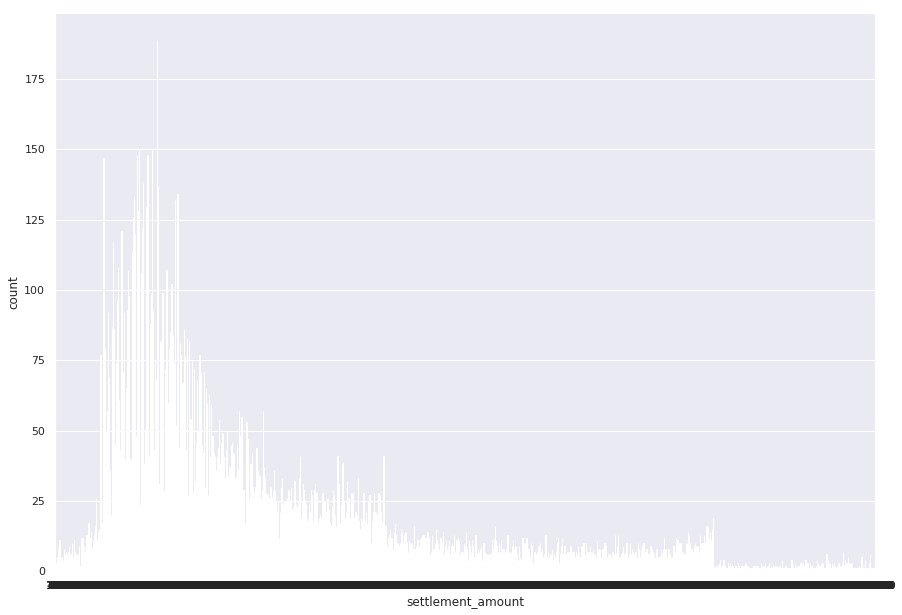

In [41]:
sns.countplot(x='settlement_amount',palette="Set3",data=settlements) # frequency distribution of settlement_amount

#### Settlement Amount 

Settlement Amount is seen to be relatively higher in the more recent cycles (barring a few outliers). 

Could indicate that people have started using APS more regularly since it's inception. Will discuss further in transactions

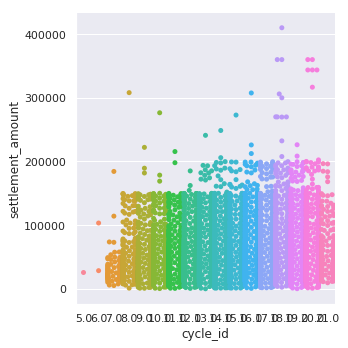

In [42]:
sns.catplot(y="settlement_amount", x="cycle_id", kind="swarm", data=settlements.sample(10000))

In [43]:
# removing top two values for a better visual representation
settlements = settlements[settlements.settlement_amount != 746000]
settlements = settlements[settlements.settlement_amount != 710500]

#### Settlement status vs Settlement amount

While they do not differ a lot in terms of their distribution, we can still learn something.

1. Even though most settlements are centered around the 50,000 mark, quite a few outliers are present on the upside of 1,00,0000.

2. Bills which are settled have a lot more outliers involved than the other two.

In [44]:
settlements.settlement_status.value_counts()

bill_settled          22394
onetime_settlement     5703
bill_pending           2584
Name: settlement_status, dtype: int64

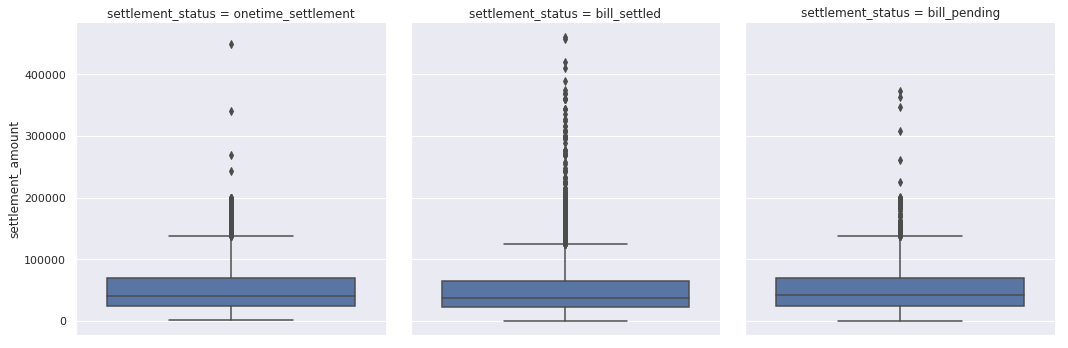

In [45]:
sns.catplot(y='settlement_amount', col='settlement_status', kind='box', data=settlements)

#### Days Delayed

One should expect that settlements with large value take more time to receive, but we can observe from this scatter plot that most settlements with lesser amounts are the ones who take a longer time.

It has a mean of 5 days +/- 9.6 days of standard deviation.

In [46]:
settlements.days_delayed.describe()

count    22394.000000
mean         5.098553
std          9.669240
min          0.000674
25%          0.587513
50%          1.186390
75%          5.790339
max        210.576996
Name: days_delayed, dtype: float64

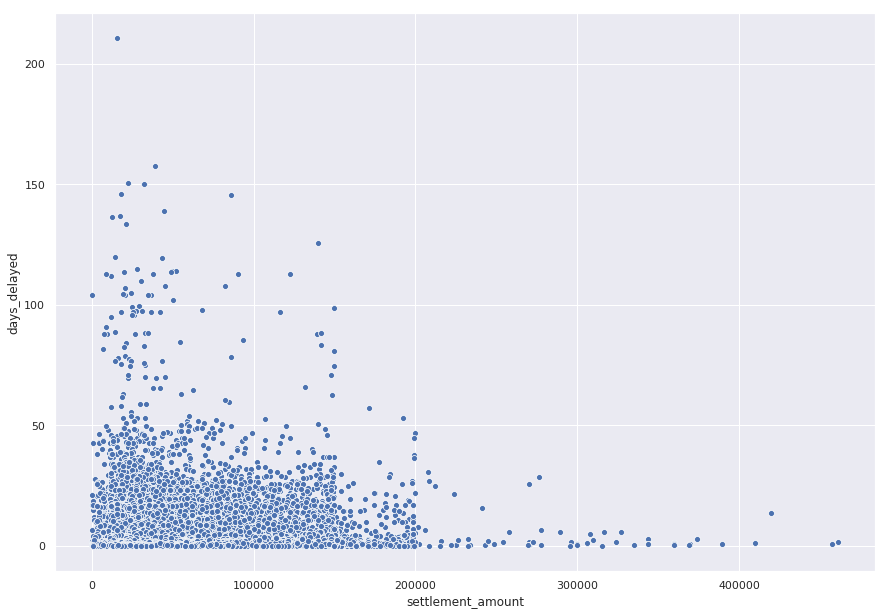

In [47]:
sns.scatterplot(y="days_delayed", x="settlement_amount", data=settlements)

## Transactions Analysis

In [48]:
transactions.head()

,transaction_id,user_id,merchant_id,transaction_amount,created_at,cycle_id
0,141695,13693,1,10100,2016-09-30 15:29:10.228672 +0000 +0000,22
1,141694,8166,1,20900,2016-09-30 15:29:00.286923 +0000 +0000,22
2,141688,15886,1,28100,2016-09-30 15:27:55.801021 +0000 +0000,22
3,141686,12014,8,18000,2016-09-30 15:27:17.891471 +0000 +0000,22
4,141684,12392,1,63500,2016-09-30 15:25:56.857979 +0000 +0000,22


### Transactions per Merchant

1. Most transactions done from Merchant 1 which ranges from 0 - 1,00,000
2. Merchant 8 and 6 have a great range of products and have sold products from cheap and expensive ranges.
3. Most significant competititors to Merchant 1 are Merchant (7,8,11,9).
4. Merchant (2,11-18) have very little selling power and range.

In [49]:
transactions.merchant_id.value_counts().head(5)

1     66845
7      2273
8      1114
11      900
9       854
Name: merchant_id, dtype: int64

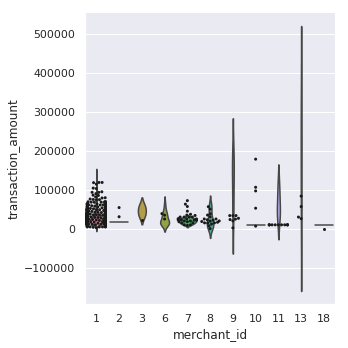

In [50]:
g = sns.catplot(x="merchant_id", y="transaction_amount", kind="violin", inner=None, data=transactions.sample(1000))
sns.swarmplot(x="merchant_id", y="transaction_amount", color="k", size=3, data=transactions.sample(1000), ax=g.ax);

In [51]:
transactions.transaction_amount.nsmallest()

33147     0
73728     0
826      44
44088    66
2534     76
Name: transaction_amount, dtype: int64

### Transactions per Cycle

1. Most transactions have been done in later cycles and also observed in settlements made in later cycles. Explains that APS has grown in popularity of late or just that the existing customers have had larger amounts to spend.

2. Cycle 22 dominates the charts with heavy presence of merchant 1 as previously noted.

3. A consistent trend of transactions has been observed in the last few cycles.

In [52]:
l1 = transactions.groupby(['cycle_id'])[['transaction_amount']].sum()
l1.head()

,transaction_amount
cycle_id,
0,9400
3,4000
4,7000
5,81900
6,391600


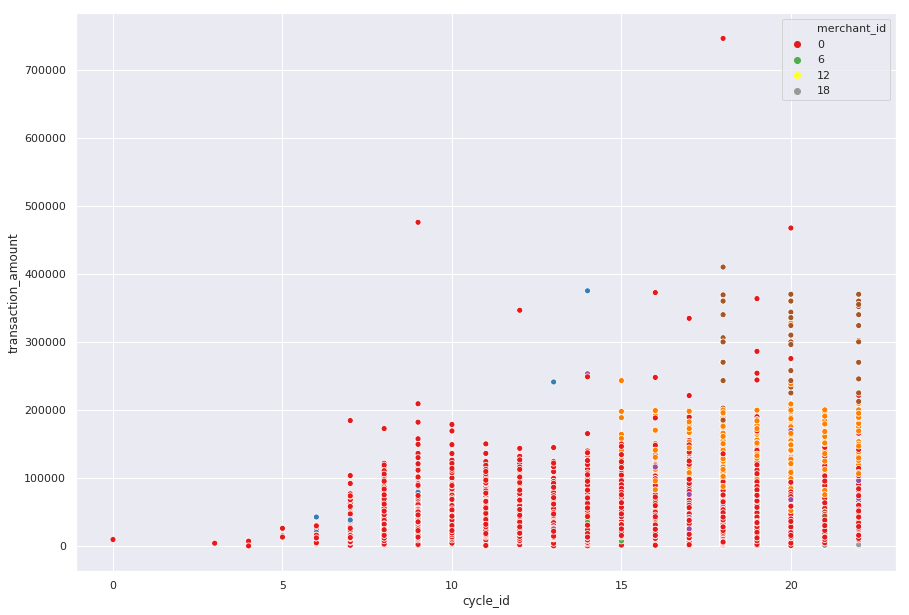

In [53]:
sns.scatterplot(x=transactions.cycle_id, y=transactions.transaction_amount, hue=transactions.merchant_id, palette='Set1')

In [54]:
l1 = transactions.groupby(['user_id'])[['transaction_amount']].sum()
l1.head()

,transaction_amount
user_id,
1,208300
2,975079
4,173800
5,112600
6,1123286


In [55]:
l3.head()

transaction_amount  settlement_amount
user_id cycle_id                                       
1       14.0                 67200.0            67200.0
        15.0                 32500.0            32500.0
        18.0                108600.0           108600.0
2       5.0                  13000.0            13000.0
        6.0                  21000.0                0.0

## Failures Analysis

#### Types of failures observed with varying transaction amounts

1. Failure error 3 & 2 are observed when transacting big amounts.

2. Failure error 1, 2, 3 are observed more frequently than 4, 5, 6.

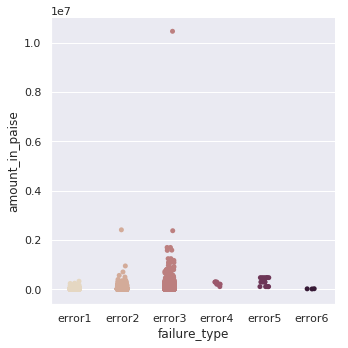

In [56]:
sns.catplot(x="failure_type", y="amount_in_paise", palette="ch:.25", data=failure);

In [57]:
# Removing the outlier
failure = failure[failure.amount_in_paise != 10454900]

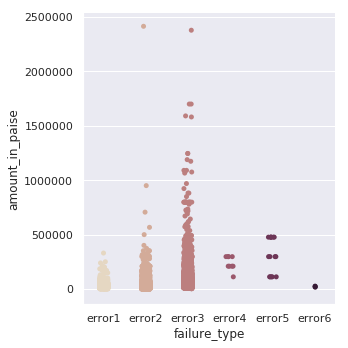

In [58]:
sns.catplot(x="failure_type", y="amount_in_paise", palette="ch:.25", data=failure)

### Transactions from different cities

1. Observation from the scatterplot is that high number of transactions are being made from cities 1-10, especially 1, 3, 5.

2. A somewhat decreasing trend continues from cities 10-50 and then cities 50 and so on, a consistent pattern of transactions below 50,000 with a few outliers.

In [59]:
l1 = transactions.groupby(['user_id'])[['transaction_amount', 'cycle_id']].sum()
ci = users.groupby(['user_id'])[['city_id']].sum()
city = pd.concat([l1, ci],axis=1)
city = city.dropna()
city.head()

,transaction_amount,cycle_id,city_id
user_id,,,
1,208300.0,93.0,4.0
2,975079.0,570.0,7.0
4,173800.0,198.0,3.0
5,112600.0,64.0,7.0
6,1123286.0,485.0,154.0


In [60]:
city[['city_id', 'transaction_amount']].nlargest(5,columns = ['transaction_amount'])

,city_id,transaction_amount
user_id,,
3346,1.0,2874600.0
12,3.0,2733600.0
975,3.0,2617300.0
3392,1.0,2572300.0
17,3.0,2546700.0


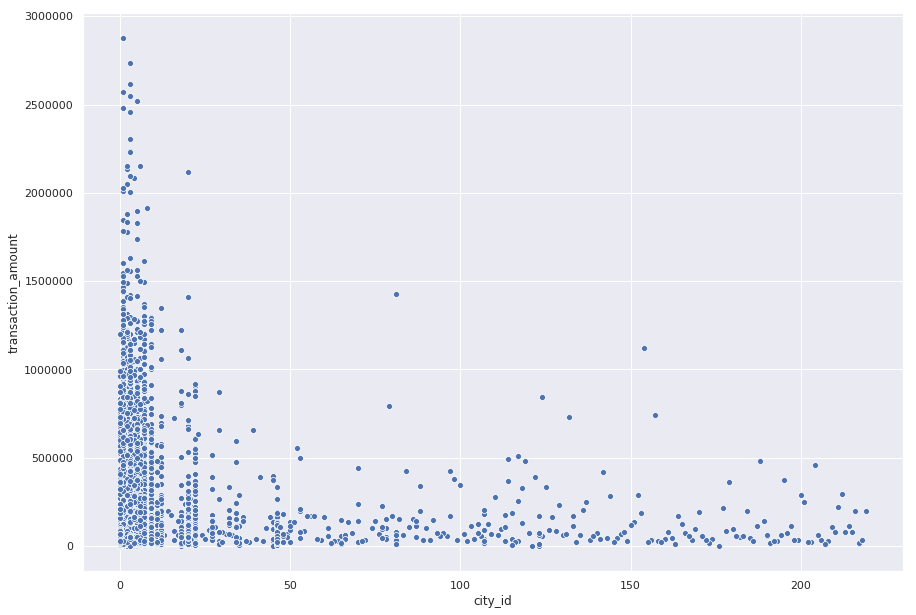

In [61]:
sns.scatterplot(x="city_id", y="transaction_amount", palette="Set2", data=city)

### Referrers vs Transactions

1. Referrer a, e have suggested to make bigger transactions.

2. Referrer b, m , n, o have made really low amounts of transactions and very few of those.

In [63]:
l1 = transactions.groupby(['user_id'])[['transaction_amount']].sum()
ref = users.groupby(['user_id'])[['referrer']].sum()
referral = pd.concat([l1, ref],axis=1)
referral = referral.dropna()
referral.head()

,transaction_amount,referrer
user_id,,
1,208300.0,a
2,975079.0,a
4,173800.0,a
5,112600.0,a
6,1123286.0,a


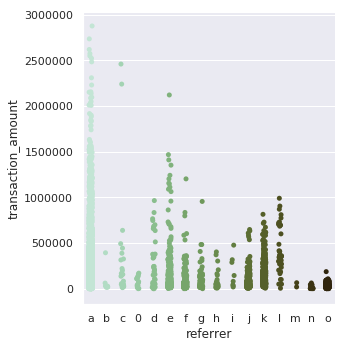

In [64]:
sns.catplot(x="referrer", y="transaction_amount", palette="ch:1.15", data=referral)

## Merging Datasets and Preparing Train, Test DataFrames

I've tried to understand the datasets as they are created along the way to keep in check if they are being merged properly without causing a lot of NaNs.

Again, this part might not be relevant to you and might seem redundant/boring so move along if you want.

### Replacing Nominal Values in Failures and Settlements

In [70]:
clean = { 'error1':1, 'error2':2, 'error3':3, 'error4':4, 'error5':5, 'error6':6}
failure.failure_type.replace(clean, inplace=True)

clean = { 'bill_settled': 0, 'onetime_settlement': 1, 'bill_pending': 2}
settlements.settlement_status.replace(clean, inplace=True)

In [110]:
clean = { 'a':0, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'k':10, 'l':11, 'j':12, 'm':13, 'n':14, 'o':15, 'nan':16}
users.referrer.replace(clean, inplace=True)

In [80]:
l1 = settlements.groupby(['user_id'])[['settlement_amount']].sum()
train = pd.concat([fail, l1],axis=1)
train = train.dropna()
train.head()

,transaction_amount,city_id,cycle_id,referrer,failure_type,amount_in_paise,settlement_amount
user_id,,,,,,,
1,208300.0,4.0,15.500000,0.0,1.000000,22400.000000,208300.0
2,975079.0,7.0,13.902439,0.0,1.928571,21644.714286,944079.0
4,173800.0,3.0,15.230769,0.0,2.000000,27100.000000,172800.0
5,112600.0,7.0,12.800000,0.0,1.833333,15000.000000,91600.0
6,1123286.0,154.0,13.472222,0.0,2.000000,40642.857143,711564.0


In [81]:
train.shape

(4882, 7)

#### The size of training reduced a lot on merging multiple DataFrames which would be a disaster while doing predictions, I'm not sure if I'm 100% correct in not choosing this method because I feel there should be a better way to do this. 

#### Start again, by merging transactions DataFrame

In [82]:
transactions.head()

,transaction_id,user_id,merchant_id,transaction_amount,created_at,cycle_id
0,141695,13693,1,10100,2016-09-30 15:29:10.228672 +0000 +0000,22
1,141694,8166,1,20900,2016-09-30 15:29:00.286923 +0000 +0000,22
2,141688,15886,1,28100,2016-09-30 15:27:55.801021 +0000 +0000,22
3,141686,12014,8,18000,2016-09-30 15:27:17.891471 +0000 +0000,22
4,141684,12392,1,63500,2016-09-30 15:25:56.857979 +0000 +0000,22


In [83]:
transactions.shape

(73731, 6)

In [185]:
t1 = pd.merge(transactions,users,left_on='user_id',right_on='user_id')
t1.head()

,transaction_id,user_id,merchant_id,transaction_amount,created_at,cycle_id,referrer,email,name,city_id
0,141695,13693,1,10100,2016-09-30 15:29:10.228672 +0000 +0000,22,0.0,13693@1.com,hra,5.0
1,129337,13693,1,18000,2016-09-18 07:44:57.65645 +0000 +0000,22,0.0,13693@1.com,hra,5.0
2,125843,13693,1,33200,2016-09-15 15:48:45.250271 +0000 +0000,22,0.0,13693@1.com,hra,5.0
3,125006,13693,1,14800,2016-09-14 16:50:54.375629 +0000 +0000,21,0.0,13693@1.com,hra,5.0
4,123303,13693,1,10100,2016-09-12 15:25:05.278552 +0000 +0000,21,0.0,13693@1.com,hra,5.0


In [184]:
t1 = t1.drop(columns = ['created_at', 'email', 'name', 'transaction_id'])
t1.columns

Index(['user_id', 'merchant_id', 'transaction_amount', 'cycle_id', 'referrer',
       'city_id'],
      dtype='object')

In [170]:
t = t1
t.head()

,user_id,merchant_id,transaction_amount,cycle_id,referrer,city_id
0,13693,1,10100,22,0.0,5.0
1,13693,1,18000,22,0.0,5.0
2,13693,1,33200,22,0.0,5.0
3,13693,1,14800,21,0.0,5.0
4,13693,1,10100,21,0.0,5.0


In [171]:
t1 = t.loc[t['cycle_id'] != 22]
t2 = t.loc[t['cycle_id'] == 22]

In [172]:
t2.head()

,user_id,merchant_id,transaction_amount,cycle_id,referrer,city_id
0,13693,1,10100,22,0.0,5.0
1,13693,1,18000,22,0.0,5.0
2,13693,1,33200,22,0.0,5.0
8,8166,1,20900,22,0.0,1.0
9,8166,1,19400,22,0.0,1.0


#### Moving to creation of x_train, y_train, x_test and making predictions

In [179]:
l1 = transactions.groupby(['user_id'])[['transaction_amount', 'merchant_id']].sum()

l2 = settlements.groupby(['user_id'])[['settlement_amount']].sum()

l3 = pd.concat([l1, l2],axis=1)

l3.settlement_amount = l3.settlement_amount.fillna(0)
l3.transaction_amount = l3.transaction_amount.fillna(0)
l3.head()

,transaction_amount,merchant_id,settlement_amount
user_id,,,
1,208300,6,208300.0
2,975079,173,944079.0
4,173800,83,172800.0
5,112600,25,91600.0
6,1123286,157,711564.0


In [174]:
x_test = t2[['transaction_amount', 'merchant_id']]
x_test.shape

(8666, 2)

In [175]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(l3[['transaction_amount', 'merchant_id']], l3.settlement_amount)
test_predictions1 = clf1.predict(x_test)

In [186]:
test_predictions1

array([    0., 18000., 33200., ...,     0., 25400., 26100.])

In [178]:
solution = pd.DataFrame(test_predictions1)
solution.to_csv('predictions.csv')